In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import rasterio
from rasterio.plot import show
import cartopy.crs as ccrs
import xarray as xr

In [2]:
def data_and_mesh(data):
    xx, yy = np.meshgrid(data['x'].values, data['y'].values)
    values = data.values

    return [xx, yy, values]

In [38]:
# Read in precip data
rain_fp = 'C:/Users/moo90/Box/data/misc/hyd264_data/friant_precip.csv'
rain_data = pd.read_csv(rain_fp, index_col=['DATE'], parse_dates=True,
                        header=0)
rain_data['WY'] = rain_data.index.to_period('A-Sep')
rain_yearly = rain_data.groupby('WY').sum()

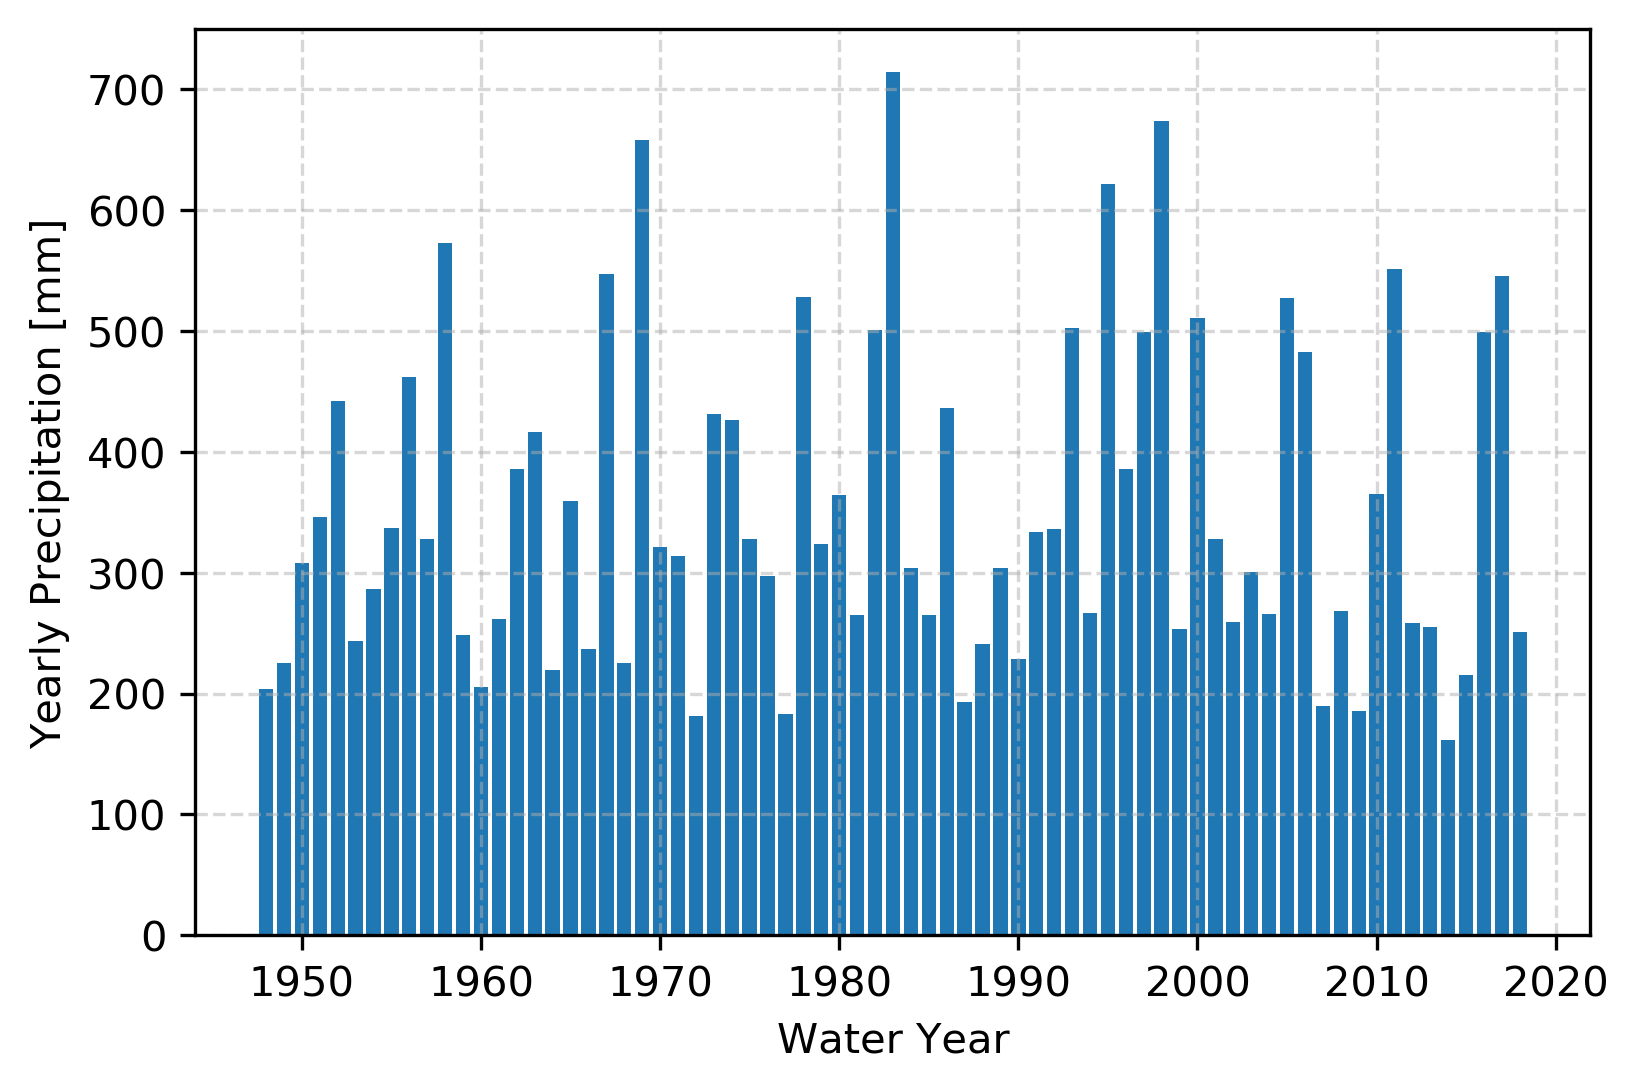

In [46]:
# Plot out yearly rainfall

fig, ax = plt.subplots(**{'figsize':(6,4), 'dpi':300})

ax.bar(rain_yearly.index.year, rain_yearly['PRCP'])
ax.set_ylabel('Yearly Precipitation [mm]')
ax.set_xlabel('Water Year')
ax.grid(ls='--', alpha=.5)

plt.show()

[0.         0.00140845 0.         0.0056338  0.00140845 0.0028169
 0.0028169  0.00422535 0.00140845 0.00422535 0.00704225 0.0084507
 0.         0.00140845 0.00140845 0.0056338  0.00140845 0.00704225
 0.00422535 0.00140845 0.00140845 0.0028169  0.         0.0028169
 0.         0.         0.00140845 0.00140845 0.0028169  0.00140845
 0.         0.00140845 0.         0.00140845 0.0028169  0.0028169
 0.00140845 0.0028169  0.         0.0028169  0.00140845 0.
 0.00140845 0.         0.         0.         0.         0.00140845
 0.         0.         0.00140845 0.         0.00140845 0.
 0.         0.         0.00140845 0.         0.         0.
 0.         0.         0.         0.        ] [150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320
 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500
 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680
 690 700 710 720 730 740 750 760 770 780 790]
64 65


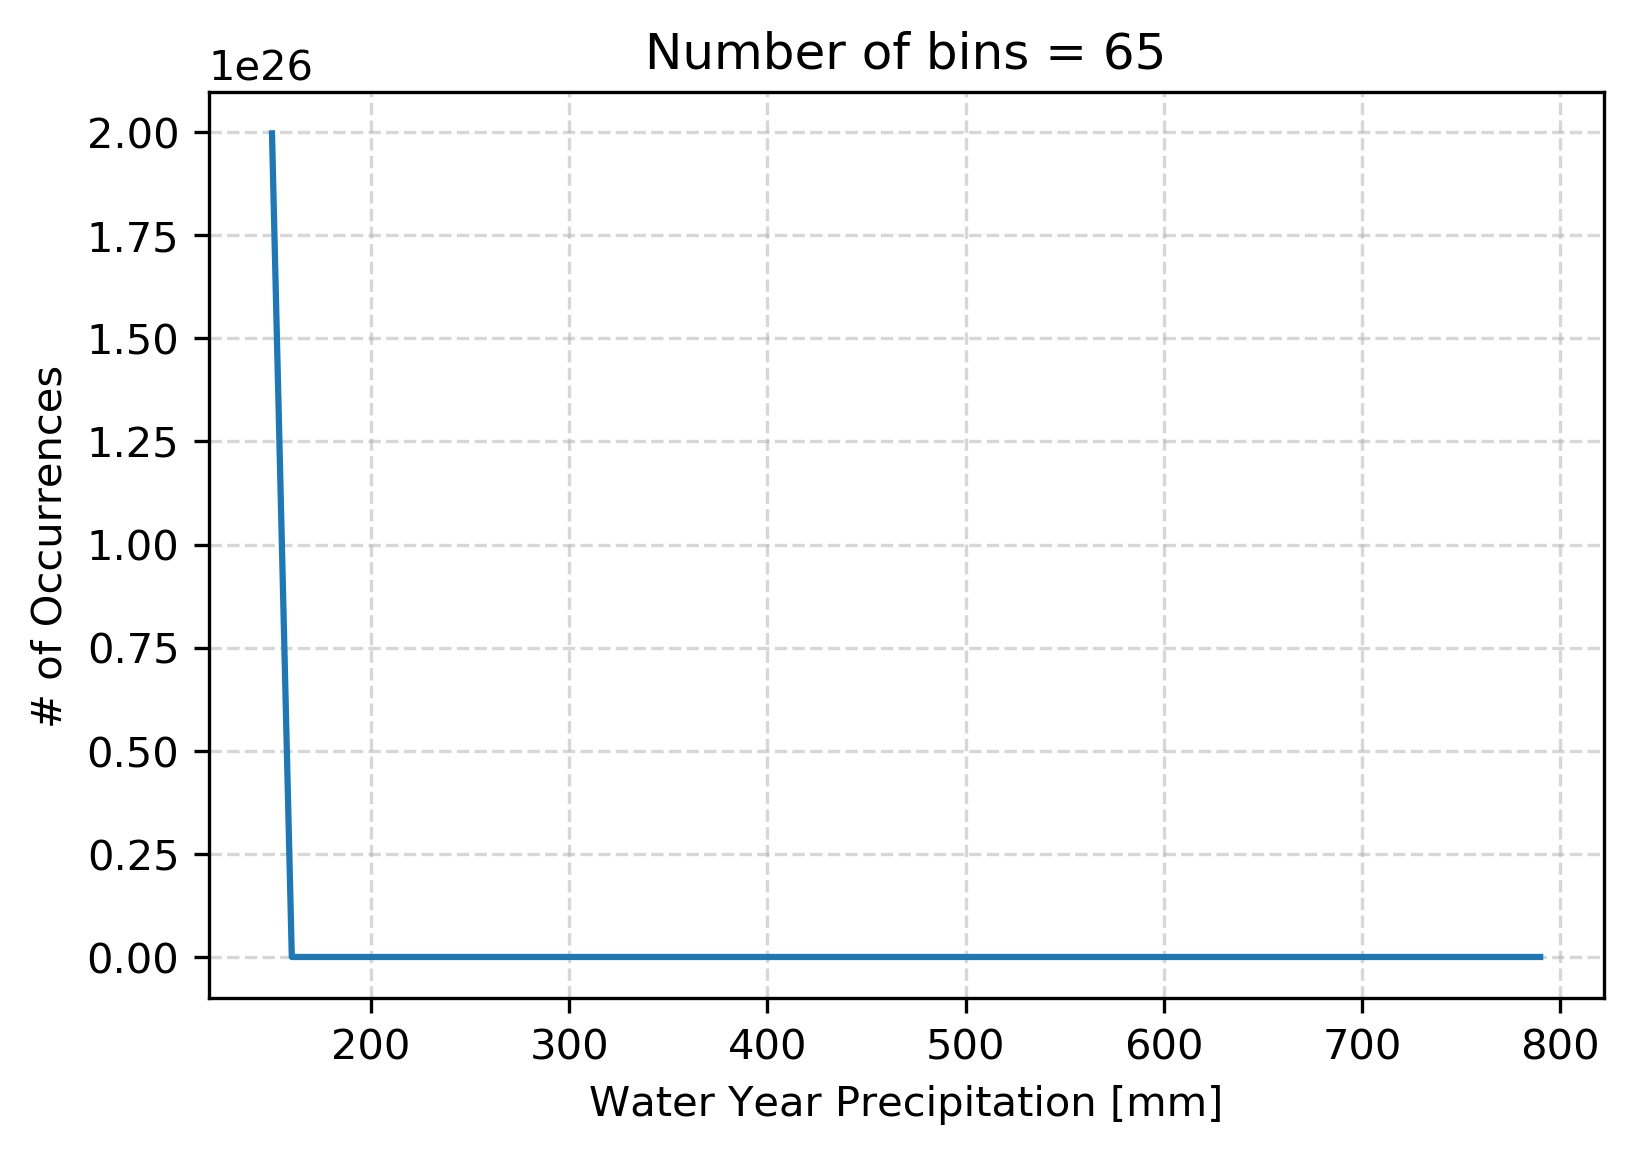

In [84]:
# Calculate fit of gamma distribution for yearly data
bins = np.arange(150, 800, 10)
counts, precip_bin = np.histogram(rain_yearly['PRCP'].values, bins=bins, density=True)
print(counts, precip_bin)

params = stats.gamma.fit(counts)
yearly_gamma = stats.gamma.pdf(np.arange(len(precip_bin)), *params)
print(counts.size, precip_bin.size)
# Plot out histogram


fig, ax = plt.subplots(**{'figsize':(6,4), 'dpi':300})
#ax.bar(precip_bin, counts)
ax.plot(precip_bin, yearly_gamma)
ax.set_ylabel('# of Occurrences')
ax.set_xlabel('Water Year Precipitation [mm]')
ax.set_title(f'Number of bins = {len(bins)}')
ax.grid(ls='--', alpha=.5)

plt.show()

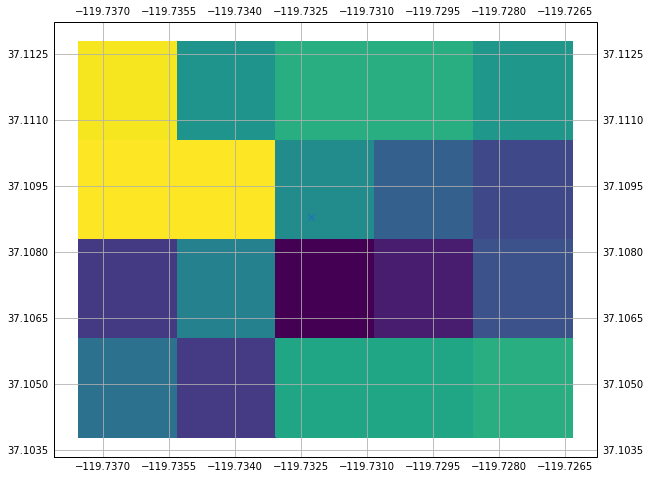

In [8]:
plot_crs = ccrs.PlateCarree()
img_crs = ccrs.Sinusoidal()
sample_img_fp = 'C:/Users/moo90/Box/data/misc/hyd264_data/modis_sr/2001_01_01.tif'
sample_img = xr.open_rasterio(sample_img_fp).sel(band=5)

#ndvi = sample_img.read(5)
#ndvi_plot = plt.imshow(ndvi)
#plt.colorbar(ndvi_plot)
#plt.show()
fig,ax = plt.subplots(subplot_kw={'projection':plot_crs}, **{'figsize':(10,8)})#,'rasterized':True})
ax.pcolormesh(*data_and_mesh(sample_img))#, transform=plot_crs)
gl = ax.gridlines(crs=plot_crs, draw_labels=True)
ax.scatter(-119.73228, 37.10878, marker='x')
#ax.set_xlim(-119.8, -119.65)
#ax.set_ylim(37.05, 37.5)